# Clothes Classifier

## 1st Class: Knowing the dataset

- In this code we use deep learning to classify what is the category of each clothes according to the image beeing showed to us.

- We're going to use Keras library (Tensorflow)

> Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. [gitHub](https://github.com/zalandoresearch/fashion-mnist)

In [27]:
from tensorflow import keras

dataset = keras.datasets.fashion_mnist
((images_train, identity_train), (images_test, identity_test)) = dataset.load_data() 
# images = x, identity = y 
len(images_train)
images_train.shape

(60000, 28, 28)

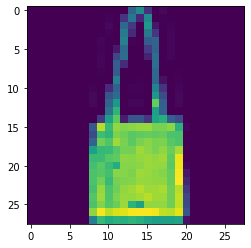

In [34]:
import matplotlib.pyplot as plt

plt.imshow(images_train[200])